## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# check each data set and group to look for duplicates of Mouse ID
mouse_check_df = mouse_metadata.groupby(['Mouse ID'])['Mouse ID'].sum()
#print(mouse_check_df)
mouse_count=len(mouse_check_df)

print(mouse_count)
#no duplicate mouse IDs found in mouse_metadata.  249 unique mouse data entries  

#Total # of study results entries
study_len=len(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(left=mouse_metadata, right=study_results, on="Mouse ID", how="outer")
combined_df


249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count=combined_df.groupby(['Mouse ID'])
#print(mouse_count)

len(mouse_count.count())
#249 mouse entries(rows) same as mouse_metadata.  We have all mice accounted for and all studies in the same table.


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  Counting for each timepoint to reveal timepoint duplicates. 
mouse_id_tp=pd.DataFrame(combined_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count())
mouse_id_tp.head()
#checking for duplicate "timepoint and mouse id entries with for-loop"
for x in mouse_id_tp['Timepoint']:
    if x > 1:
        print(x)
           
# Returns 5 values above 1 so we havea total of 5 duplicate Mouse ID and Timepoints.  Need to figure out which ones

2
2
2
2
2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
tp_dup_df=mouse_id_tp
tp_dup_df['TP Counts'] = combined_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
tp_dup_df=tp_dup_df.loc[tp_dup_df['TP Counts'] > 1]

#Will use to double check that all duplicate Mouse ID and Timepoint entries are removed from orginal entry list by count.  
tot_dup_count=len(tp_dup_df)

#Merge back with combined list
dup_combined_df=pd.merge(left=combined_df, right=tp_dup_df, on="Mouse ID", how="inner")
#len(dup_combined_df)
#Resulted with duplicates based on merge above, will remove duplicates to create data frame for duplicate mouse ID
dup_info_df=dup_combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint_x'], keep='first')


dup_info_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y,TP Counts
0,g989,Propriva,Female,21,26,0,45.000000,0,2,2
10,g989,Propriva,Female,21,26,5,48.786801,0,2,2
20,g989,Propriva,Female,21,26,10,51.745156,0,2,2
30,g989,Propriva,Female,21,26,15,51.325852,1,2,2
40,g989,Propriva,Female,21,26,20,55.326122,1,2,2
50,g989,Propriva,Female,21,26,25,56.045564,1,2,2
55,g989,Propriva,Female,21,26,30,59.082294,1,2,2
60,g989,Propriva,Female,21,26,35,62.570880,2,2,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Using drop duplicates to drop duplicated Mouse ID and Timepoint_x
cleaned_combined_df=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_len=len(cleaned_combined_df['Mouse ID'])

#lenght we started from original merge of the lists, with duplicates subtracted
non_dup_len= (study_len) - (tot_dup_count)

#  Assert statement to check correct number entries in dataframe with no duplicates.
assert cleaned_len == non_dup_len

#cleaned_combined_df.to_csv('Cleaned Drug Data')  



## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_stat = cleaned_combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
drug_mean = pd.DataFrame(tumor_vol_stat.mean())

drug_median =tumor_vol_stat.median()
drug_var = tumor_vol_stat.var()
drug_std = tumor_vol_stat.std()
drug_sem = tumor_vol_stat.sem()



drug_mean["Median Tumor Volume"] = drug_median
drug_mean['Tumor Volume Variance']=drug_var
drug_mean['Tumor Volume STDev']=drug_std
drug_mean['Tumor Volume SEM'] = drug_sem
drug_mean.rename(columns={'Tumor Volume (mm3)': "Tumor Volume Mean"})

drug_mean
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume STDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_stat = cleaned_combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
drug_mean = pd.DataFrame(tumor_vol_stat.mean())

drug_median =tumor_vol_stat.median()
drug_var = tumor_vol_stat.var()
drug_std = tumor_vol_stat.std()
drug_sem = tumor_vol_stat.sem()



drug_mean["Median Tumor Volume"] = drug_median
drug_mean['Tumor Volume Variance']=drug_var
drug_mean['Tumor Volume STDev']=drug_std
drug_mean['Tumor Volume SEM'] = drug_sem
drug_mean.rename(columns={'Tumor Volume (mm3)': "Tumor Volume Mean"})

drug_mean
#drug_agg=cleaned_combined_df.groupby('Drug Regimen').agg(mean)
#drug_agg
#Use groupby.agg function
#cleaned_combined_df
# This method produces everything in a single groupby function.

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume STDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

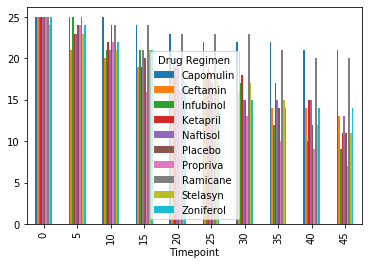

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
#Generate copy of cleaned_combined for editting.
bar_pd_df = cleaned_combined_df
#Use pivot table instead of groupby
bar_pd_df = bar_pd_df.pivot_table(index = 'Timepoint', columns ='Drug Regimen',values ='Mouse ID'  ,aggfunc = 'count' )

#plot bar chart
ax = bar_pd_df.plot(kind = 'bar', rot=90)

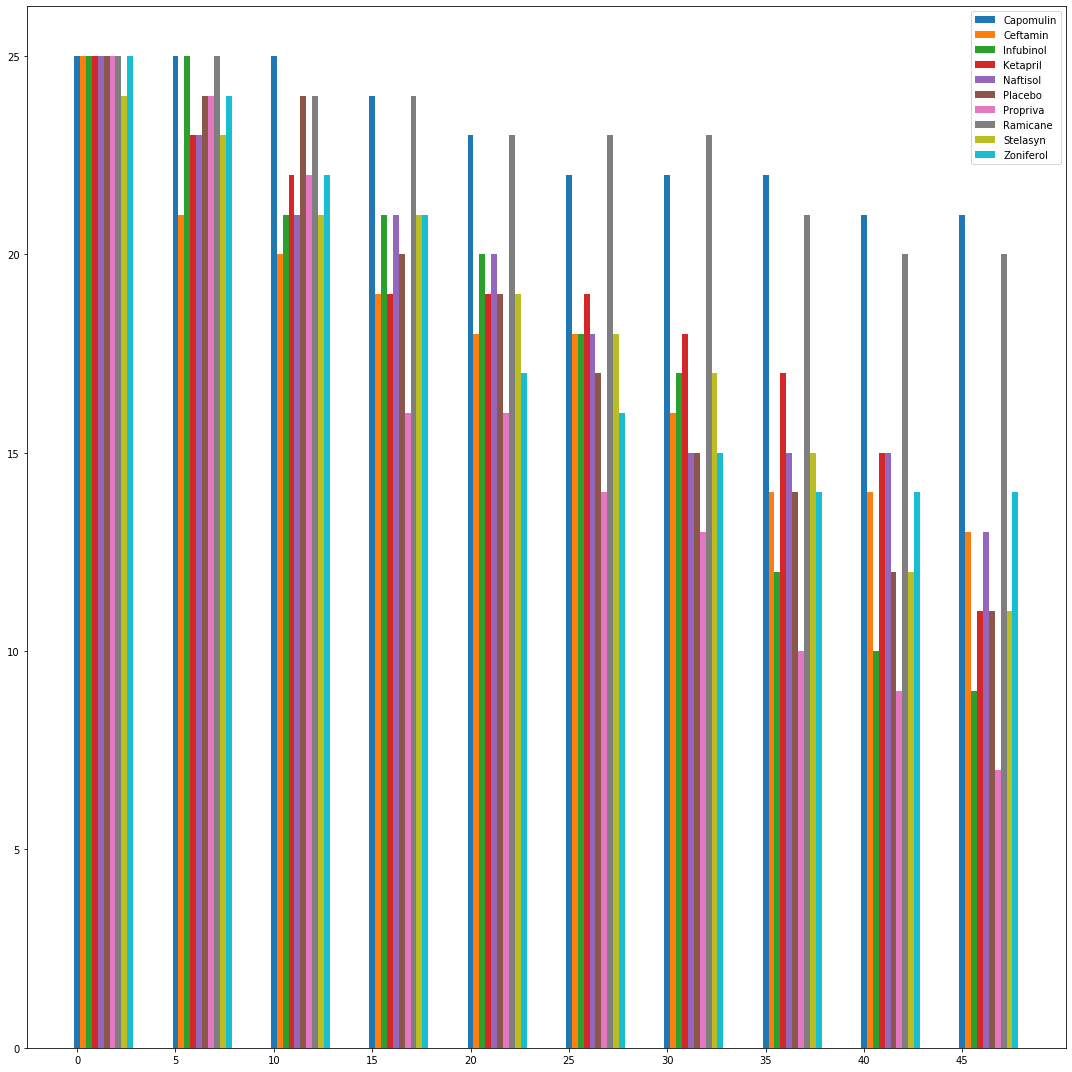

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Create copy of cleaned_combined_df for editting using grouby instead of pivot table
bar_mp_df=cleaned_combined_df.groupby(["Timepoint", "Drug Regimen"])['Mouse ID'].count().reset_index()


fig, ax = plt.subplots(figsize=(15,15))
#create x axis for unique time plots
x=bar_mp_df['Timepoint'].unique()
x
#Define bar width for bar chart
bar_width = 0

#Insert for loop to loop through each unique Drug Regimen

for drug in bar_mp_df['Drug Regimen'].unique():
    b2 = ax.bar(x + bar_width, bar_mp_df.loc[bar_mp_df['Drug Regimen'] == drug, 'Mouse ID'], width=0.3)
    bar_width += .3
    plt.xticks(x)
fig.tight_layout()
# Create legeng for Drug Regimen's
ax.legend(bar_mp_df['Drug Regimen'])



## Pie Plots

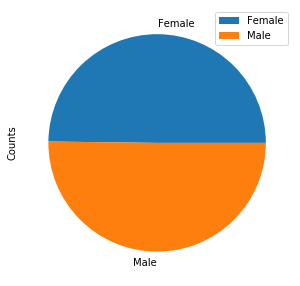

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#New data frame to overwrite, group by sex and mouse id, list unique mouse ID only

pie_pan_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())

pie_pan_df=pie_pan_df.pivot_table(index= 'Sex', values='Mouse ID', aggfunc='count')
pie_pan_df
#bar_pd_df = bar_pd_df.pivot_table(index = 'Timepoint', columns ='Drug Regimen',values ='Mouse ID'  ,aggfunc = 'count' )

##pie_pan_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())
#pie_pan_df=pie_pan_df.reset_index()
##pie_pan_df
#groupby sex and cout our unique mouse id
##pie_pan_df=pd.DataFrame(pie_pan_df.groupby('Sex')['Mouse ID'].count().reset_index())
#pie_pan_df['Count']=pie_pan_df['Mouse ID']

pie_pan_df['Counts']=pie_pan_df['Mouse ID']

pie_pan_df=pie_pan_df.reset_index()
pie_pan_df['Sex_2']=pie_pan_df['Sex']

pie_pan_df
y=pie_pan_df['Counts'].values
labels=pie_pan_df['Sex_2']
pie_pan_df=pie_pan_df.set_index('Sex')
ax=pie_pan_df.plot(y='Counts', kind='pie', labels=labels,figsize=(5,5))




([<matplotlib.patches.Wedge at 0x23bef32e8c8>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

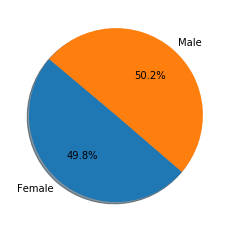

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_mat_df=pd.DataFrame(cleaned_combined_df.groupby(['Sex','Mouse ID'])['Mouse ID'].unique())
pie_mat_df=pie_mat_df.pivot_table(index= 'Sex', values='Mouse ID', aggfunc='count')
pie_mat_df=pie_mat_df.reset_index()

u=pie_mat_df['Sex'].unique()
u
c=pie_mat_df['Mouse ID'].unique()
c
plt.pie(c, labels=u,shadow=True,autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
n_ccd=pd.DataFrame(cleaned_combined_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max())
n_ccd=n_ccd.reset_index()
n_ccd
merge_drug_2=pd.merge(left=n_ccd, right=cleaned_combined_df, how='left')
merge_drug_2=pd.DataFrame(merge_drug_2)
merge_drug_3=merge_drug_2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#Print and ID the lowest 4 average volumes to make IQR data on
print(merge_drug_3)
# Will use Capomulin, Ramicane, Propriva, Ceftamin

#Create Data frames for each drug selected using final tumore volume fo each mouse
cap_df=merge_drug_2.loc[merge_drug_2['Drug Regimen']=='Capomulin']
ram_df=merge_drug_2.loc[merge_drug_2['Drug Regimen']=='Ramicane']
prop_df=merge_drug_2.loc[merge_drug_2['Drug Regimen']=='Propriva']
ceft_df=merge_drug_2.loc[merge_drug_2['Drug Regimen']=='Ceftamin']

#Calculate IRQ for Capomulin
cap_quartile=cap_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
cap_lowerq = cap_quartile[.25]
cap_upperq = cap_quartile[.75]
cap_iqr =cap_upperq-cap_lowerq
#Added later for print statement to make clear table should be empty, no outliers
cap_min_vol=cap_df['Tumor Volume (mm3)'].min()
cap_max_vol=cap_df['Tumor Volume (mm3)'].max()
# set up bounds for outlier table.  Use 1.5*IQR value calculated above
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"For Capomulin the Tumor Volume Lower Bound is {cap_lower_bound} and Minumum Tumore Volume (mm3) is {cap_min_vol}")
print(f"For Capomulin Tumor Volume Upper Bound is {cap_upper_bound} and Maximum Tumore Volume (mm3) is {cap_max_vol}")
#print(f"Values below {lower_bound} could be outliers.")

#Create table of outliers
cap_drug_out = cap_df.loc[(cap_df['Tumor Volume (mm3)'] < cap_lower_bound) | (cap_df['Tumor Volume (mm3)'] > cap_upper_bound)]
print(cap_drug_out)

#Calculate IRQ for Ramicane
ram_quartile=ram_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ram_lowerq = ram_quartile[.25]
ram_upperq = ram_quartile[.75]
ram_iqr =ram_upperq-ram_lowerq
#Added later for print statement to make clear table should be empty, no outliers
ram_min_vol=ram_df['Tumor Volume (mm3)'].min()
ram_max_vol=ram_df['Tumor Volume (mm3)'].max()
# set up bounds for outlier table.  Use 1.5*IQR value calculated above
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"For Ramicane the Tumor Volume Lower Bound is {ram_lower_bound} and Minumum Tumore Volume (mm3) is {ram_min_vol}")
print(f"For Ramicane Tumor Volume Upper Bound is {ram_upper_bound} and Maximum Tumore Volume (mm3) is {ram_max_vol}")
#print(f"Values below {lower_bound} could be outliers.")

#Create table of outliers
ram_drug_out = ram_df.loc[(ram_df['Tumor Volume (mm3)'] < ram_lower_bound) | (ram_df['Tumor Volume (mm3)'] > ram_upper_bound)]
print(ram_drug_out)

#Calculate IRQ for Propriva
prop_quartile=prop_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
prop_lowerq = prop_quartile[.25]
prop_upperq = prop_quartile[.75]
prop_iqr =prop_upperq-prop_lowerq
#Added later for print statement to make clear table should be empty, no outliers
prop_min_vol=prop_df['Tumor Volume (mm3)'].min()
prop_max_vol=prop_df['Tumor Volume (mm3)'].max()
# set up bounds for outlier table.  Use 1.5*IQR value calculated above
prop_lower_bound = prop_lowerq - (1.5*prop_iqr)
prop_upper_bound = prop_upperq + (1.5*prop_iqr)
print(f"For Propriva the Tumor Volume Lower Bound is {prop_lower_bound} and Minumum Tumore Volume (mm3) is {prop_min_vol}")
print(f"For Propriva Tumor Volume Upper Bound is {prop_upper_bound} and Maximum Tumore Volume (mm3) is {prop_max_vol}")
#print(f"Values below {lower_bound} could be outliers.")

#Create table of outliers
prop_drug_out = prop_df.loc[(prop_df['Tumor Volume (mm3)'] < prop_lower_bound) | (prop_df['Tumor Volume (mm3)'] > prop_upper_bound)]
print(prop_drug_out)

#Calculate IRQ for Ceftamin
ceft_quartile=ceft_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
ceft_lowerq = ceft_quartile[.25]
ceft_upperq = ceft_quartile[.75]
ceft_iqr =ceft_upperq-ceft_lowerq
#Added later for print statement to make clear table should be empty, no outliers
ceft_min_vol=ceft_df['Tumor Volume (mm3)'].min()
ceft_max_vol=ceft_df['Tumor Volume (mm3)'].max()
# set up bounds for outlier table.  Use 1.5*IQR value calculated above
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"For Ceftamin the Tumor Volume Lower Bound is {ceft_lower_bound} and Minumum Tumore Volume (mm3) is {ceft_min_vol}")
print(f"For Ceftamin Tumor Volume Upper Bound is {ceft_upper_bound} and Maximum Tumore Volume (mm3) is {ceft_max_vol}")
#print(f"Values below {lower_bound} could be outliers.")

#Create table of outliers
ceft_drug_out = ceft_df.loc[(ceft_df['Tumor Volume (mm3)'] < ceft_lower_bound) | (ceft_df['Tumor Volume (mm3)'] > ceft_upper_bound)]
print(ceft_drug_out)

print("No Outliers found in these data sets compared to upper and lower bounds")

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64
For Capomulin the Tumor Volume Lower Bound is 20.70456164999999 and Minumum Tumore Volume (mm3) is 23.34359787
For Capomulin Tumor Volume Upper Bound is 51.83201549 and Maximum Tumore Volume (mm3) is 47.68596303
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
For Ramicane the Tumor Volume Lower Bound is 17.912664470000003 and Minumum Tumore Volume (mm3) is 22.05012627
For Ramicane Tumor Volume Upper Bound is 54.30681135 and Maximum Tumore Volume (mm3) is 45.22086888
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
For Propriva the 

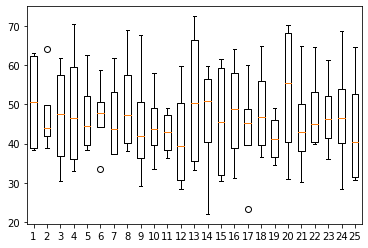

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_box=(cap_df['Tumor Volume (mm3)']).values
ram_box=ram_df['Tumor Volume (mm3)'].values
prop_box=prop_df['Tumor Volume (mm3)'].values
ceft_box=ceft_df['Tumor Volume (mm3)'].values

box_comb={"Cap":cap_box, "Ram":ram_box, "Prop":prop_box, "Ceft":ceft_box}
box_final=pd.DataFrame(box_comb)
box_final

fig, ax = plt.subplots()
ax.boxplot(box_final)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

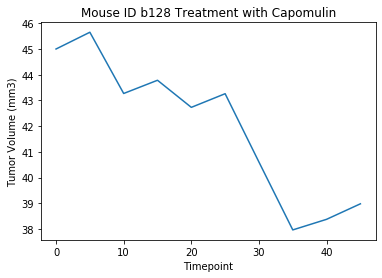

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I selected mouse b128
b128_df=cleaned_combined_df.loc[cleaned_combined_df['Mouse ID']=='b128']


b128_df_vol = b128_df['Tumor Volume (mm3)']
b128_df_tp = b128_df['Timepoint']
plt.plot(b128_df_tp,b128_df_vol )

plt.title("Mouse ID b128 Treatment with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')


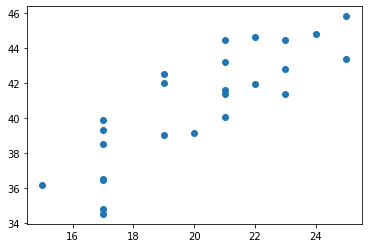

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Sorted for all Capomulin treatments
cap_scat=cleaned_combined_df.loc[cleaned_combined_df['Drug Regimen']=='Capomulin']
cap_scat_av=pd.DataFrame(cap_scat.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
cap_scat_av
cap_scat_vol=pd.DataFrame(cap_scat.groupby('Mouse ID')["Weight (g)"].mean())
cap_scat_vol
cap_scat_tb=pd.merge(left=cap_scat_av, right=cap_scat_vol, how='left', on='Mouse ID')
scatter=pd.DataFrame(cap_scat_tb)
scatter
#merge_drug_2=pd.merge(left=n_ccd, right=cleaned_combined_df, how='left')


weight=scatter['Weight (g)']
weight
vol=scatter['Tumor Volume (mm3)']
vol

plt.scatter(weight, vol)  


## Correlation and Regression

The correlation between both factors is 0.84


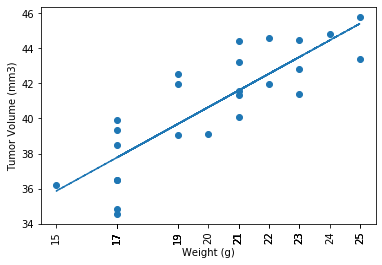

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(weight, vol)
cp_fit = cp_slope * weight + cp_int

plt.scatter(weight,vol)
plt.plot(weight,cp_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [18]:
print("Observations and Insights")
print("- There seem to a fairly substantial correlation (0.84) between mouse weight and tumor volume for those mice treated with drug Regimen Capomulin")
print("-  All drug regimens decrease tumor volume size, but to varying degress, see bar plots earlier")
print("-  The Capomulin and Ramocain regimen should be investigated fruther.\n  They display the lowest average tumor volumes and lowest endpoint tumor volumes for all drug regimens.\n Both have upper bounds that are comparalel to other average tumore volumes for other drug regimens")

Observations and Insights
- There seem to a fairly substantial correlation (0.84) between mouse weight and tumor volume for those mice treated with drug Regimen Capomulin
-  All drug regimens decrease tumor volume size, but to varying degress, see bar plots earlier
-  The Capomulin and Ramocain regimen should be investigated fruther.
  They display the lowest average tumor volumes and lowest endpoint tumor volumes for all drug regimens.
 Both have upper bounds that are comparalel to other average tumore volumes for other drug regimens
